# Steps for Time Series Analysis

* Data Ingestion
* EDA of the data
* processing of the data
* model building
* model evaluation

In [1]:
import pandas as pd

df = pd.read_csv("TSLA.CSV")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [2]:
stock_data = df[['Date', 'Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [4]:
stock_data['Date'].dtypes

dtype('O')

In [5]:
stock_data['Date']= pd.to_datetime(stock_data['Date'])

<ipython-input-5-fc1cf50ccea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']= pd.to_datetime(stock_data['Date'])


In [6]:
stock_data['Date'].dtypes

dtype('<M8[ns]')

In [7]:
stock_data.set_index('Date', inplace=True)

# Why we are converting date column as a index column

1. I can easily retrieve the data
2. Visualization is simple
3. Those libraries are designed in such a way that they require date column to be converted into index

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [8]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [9]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


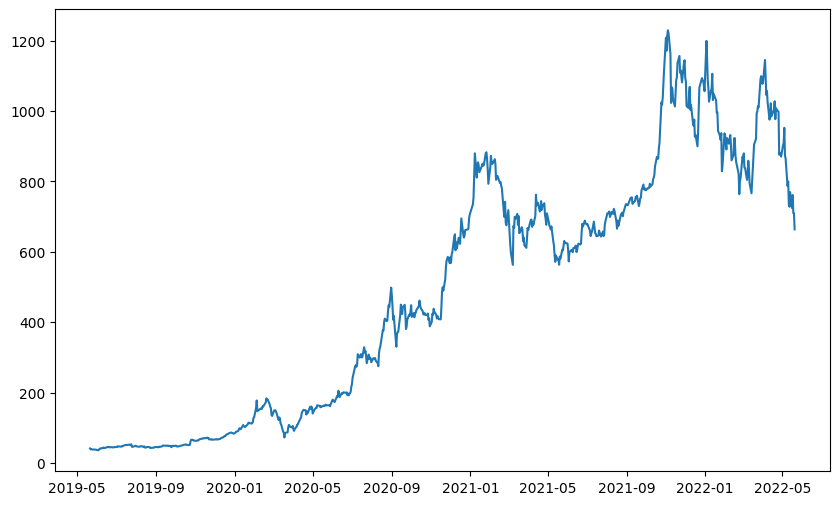

In [10]:
# EDA

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

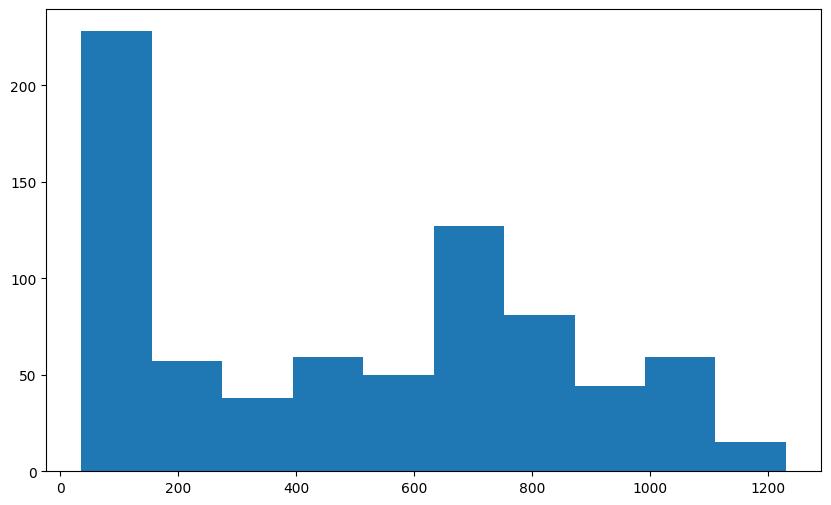

In [11]:
plt.figure(figsize=(10,6))
plt.hist(stock_data['Close'])

<ipython-input-12-7d17d4041625>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['Close'],kde = True)


<Axes: xlabel='Close', ylabel='Density'>

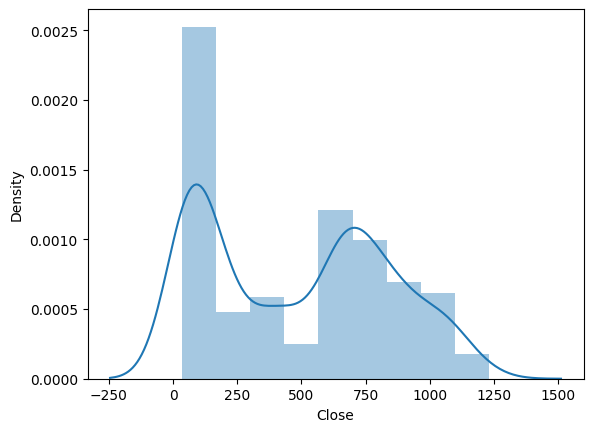

In [12]:
import seaborn as sns

sns.distplot(stock_data['Close'],kde = True)

In [13]:
rolmean = stock_data['Close'].rolling(12).mean()

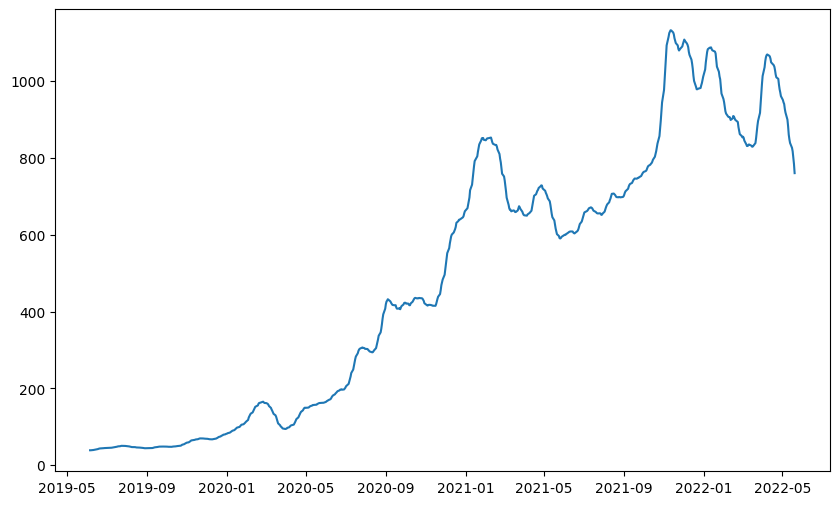

In [14]:
plt.figure(figsize=(10,6))
plt.plot(rolmean)

This graph is smoother than the original time series

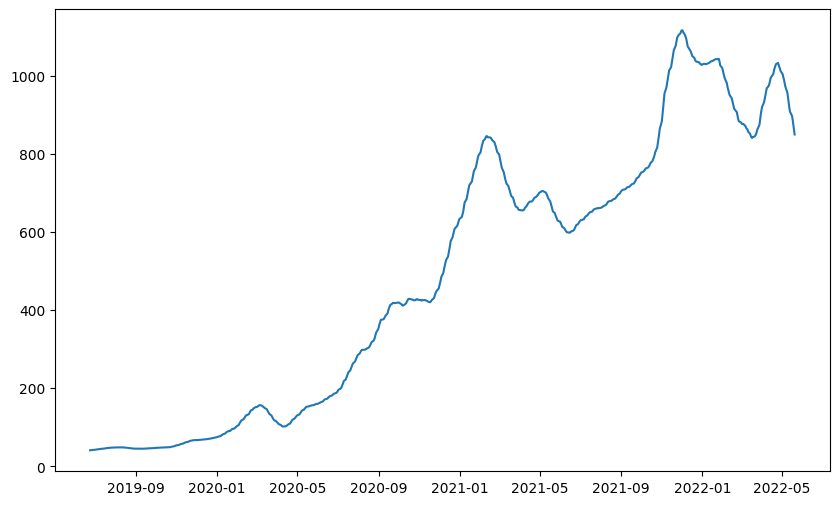

In [15]:
rolmean1 = stock_data['Close'].rolling(24).mean()
plt.figure(figsize=(10,6))
plt.plot(rolmean1)

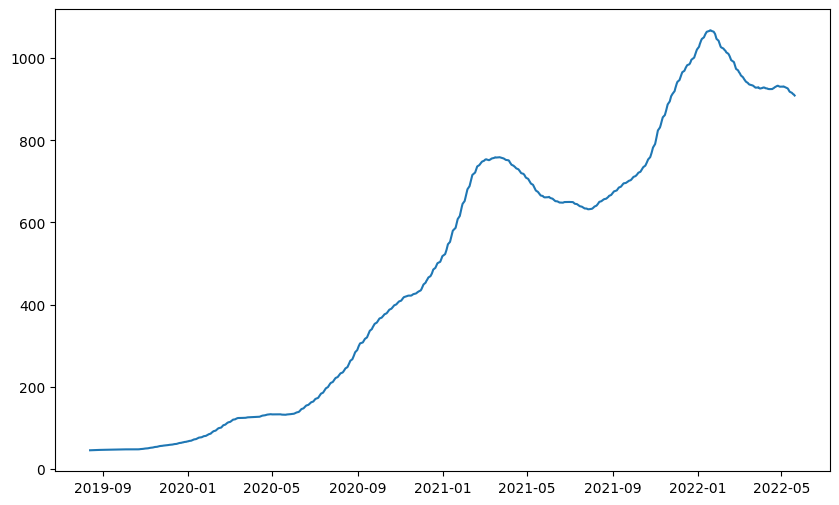

In [16]:
rolmean2 = stock_data['Close'].rolling(60).mean()
plt.figure(figsize=(10,6))
plt.plot(rolmean2)

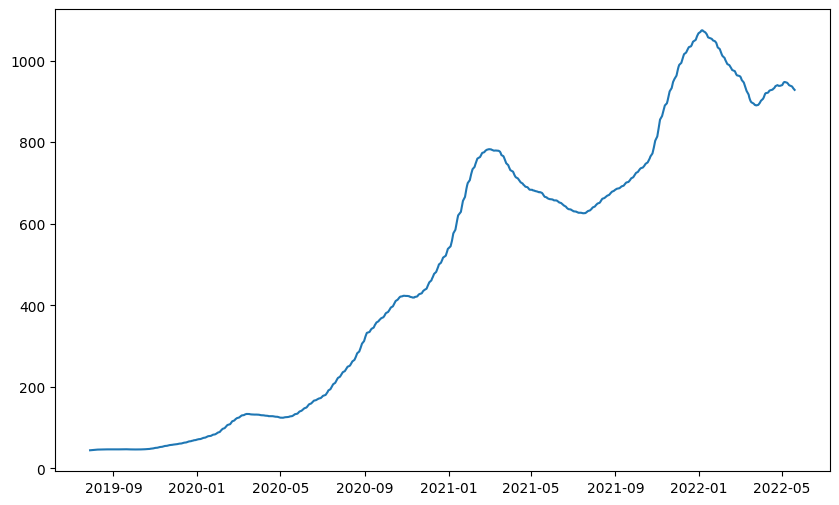

In [17]:
rolmean3 = stock_data['Close'].rolling(48).mean()
plt.figure(figsize=(10,6))
plt.plot(rolmean3)

Using Standard Deviation

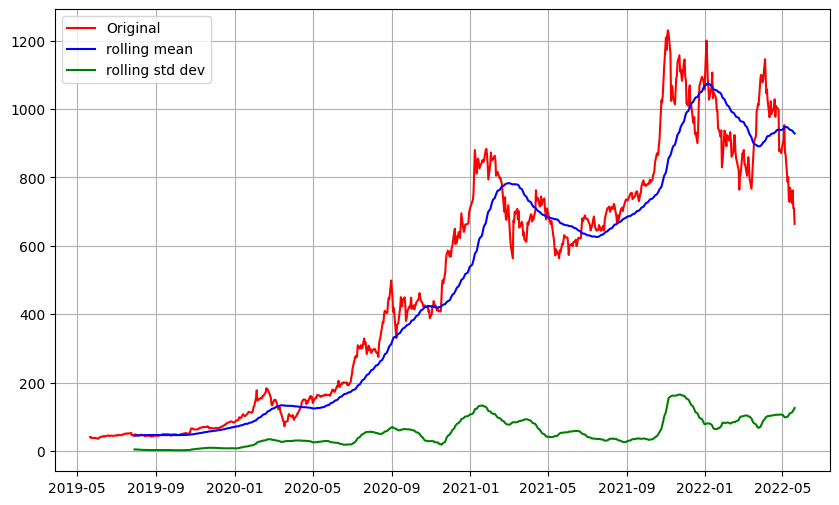

In [18]:
rolstd = stock_data['Close'].rolling(48).std()
plt.figure(figsize=(10,6))
plt.plot(stock_data.Close, color="red", label="Original")
plt.plot(rolmean3, color="blue", label="rolling mean")
plt.plot(rolstd, color="green", label="rolling std dev")
plt.grid()
plt.legend()

In [19]:
# ad-fuller test

from statsmodels.tsa.stattools import adfuller

adft = adfuller(stock_data['Close'])
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [20]:
pd.Series(adft[0:4], index=["test statistic", "p value", "lags used", "data points"])

test statistic     -1.363009
p value             0.599876
lags used           9.000000
data points       748.000000
dtype: float64

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[['Close']], period=12)

In [22]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

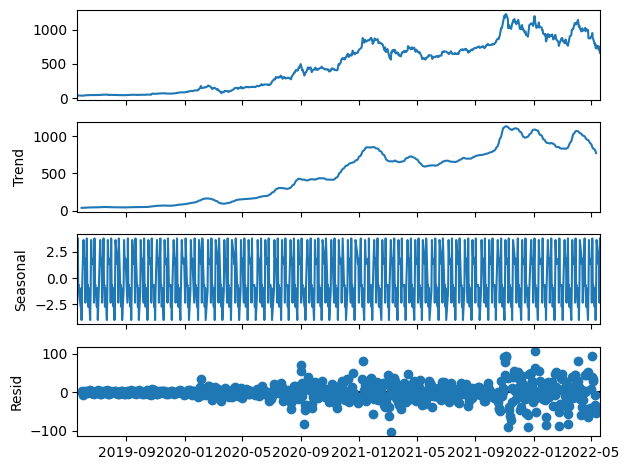

<Figure size 1300x800 with 0 Axes>

In [23]:
fig = result.plot()
fig = plt.figure(figsize=(13,8))
plt.show()

<Figure size 1700x800 with 0 Axes>

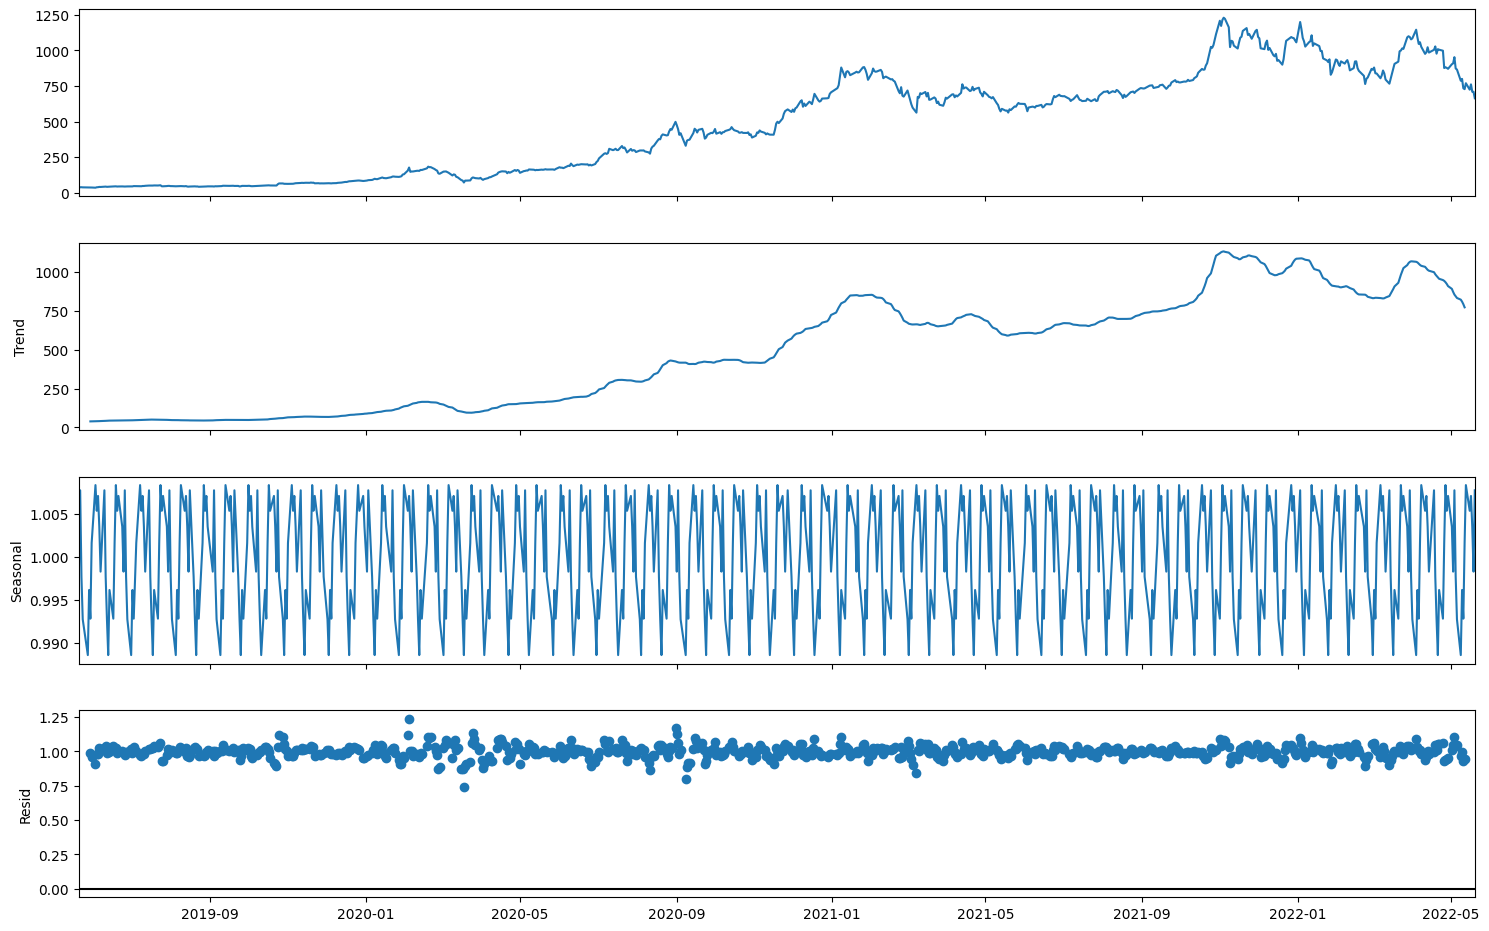

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[['Close']], period=12, model='multiplicative')
fig = plt.figure(figsize=(17,8))
fig = result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

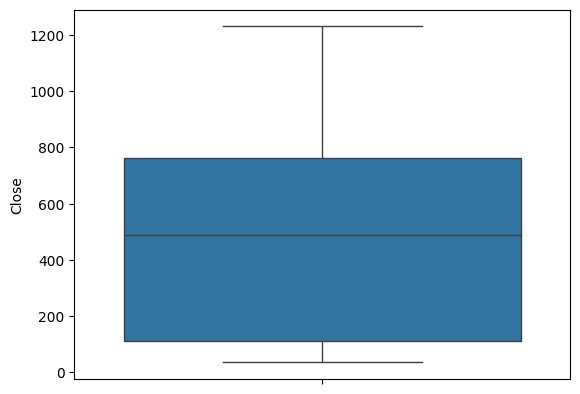

In [25]:
sns.boxplot(stock_data.Close)

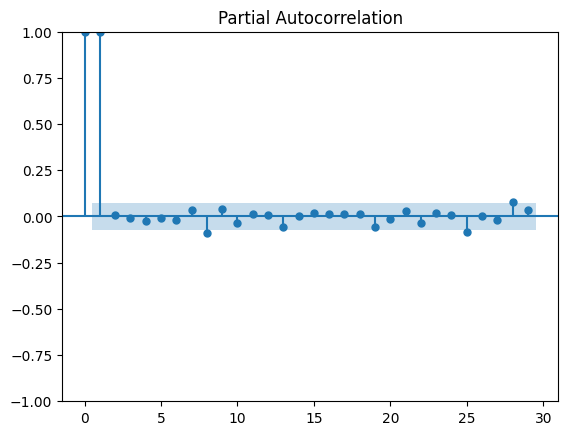

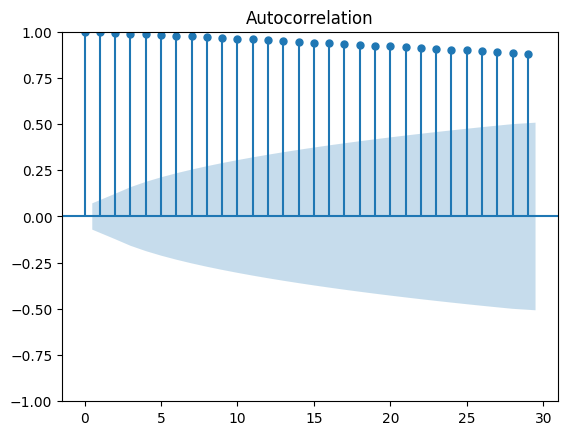

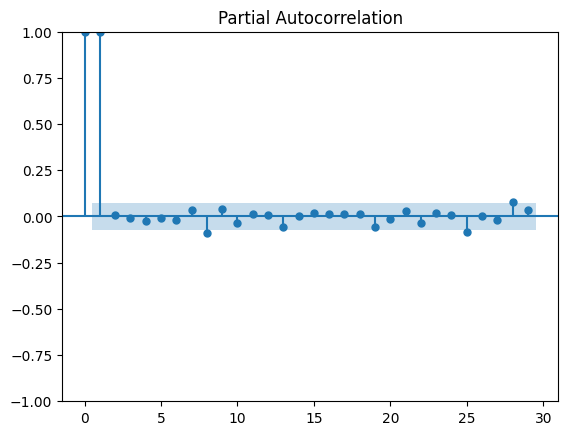

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

# Preprocessing of Data

1. Handle Missing Values
2. Convert time series to Stationary
3. If required, normalize the data
4. split data into train and test
5. clean data by removing outliers

In [27]:
df_close = stock_data['Close']

In [28]:
df_close = df_close.diff()

In [29]:
df_close.dropna(inplace=True)
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

In [30]:
adft1 = adfuller(df_close)
adft1

(-8.324564154012796,
 3.4987863921238255e-13,
 8,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6786.070514066748)

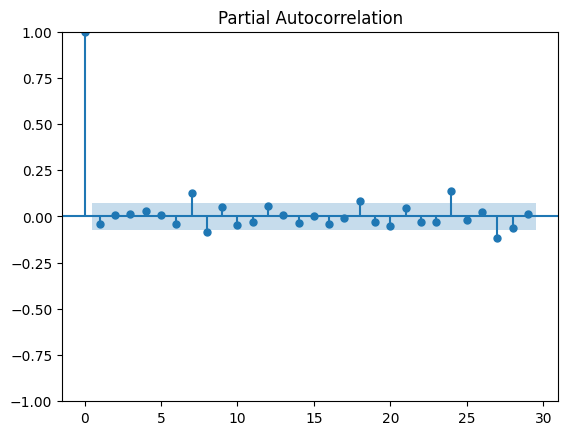

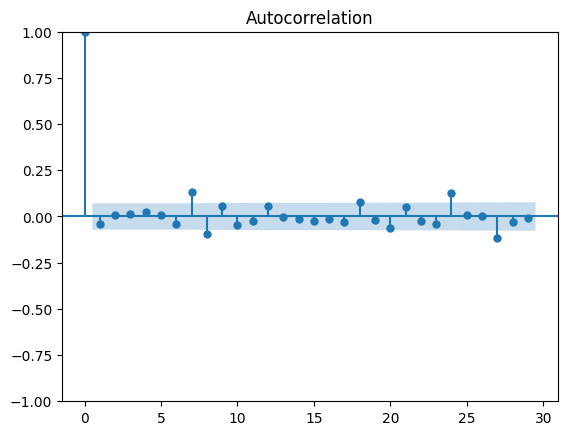

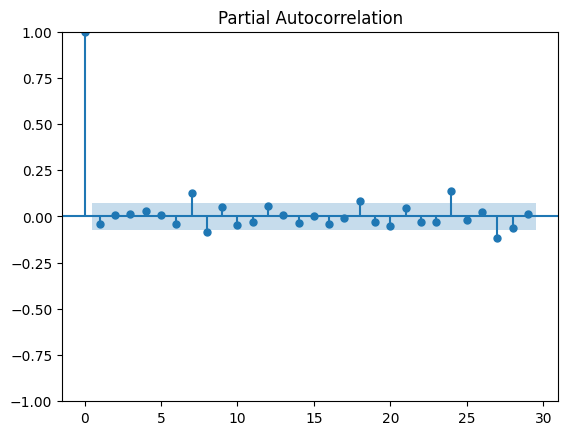

In [31]:
plot_acf(df_close)
plot_pacf(df_close)

In [32]:
train_data = df_close[:-60]
test_data = df_close[-60:]

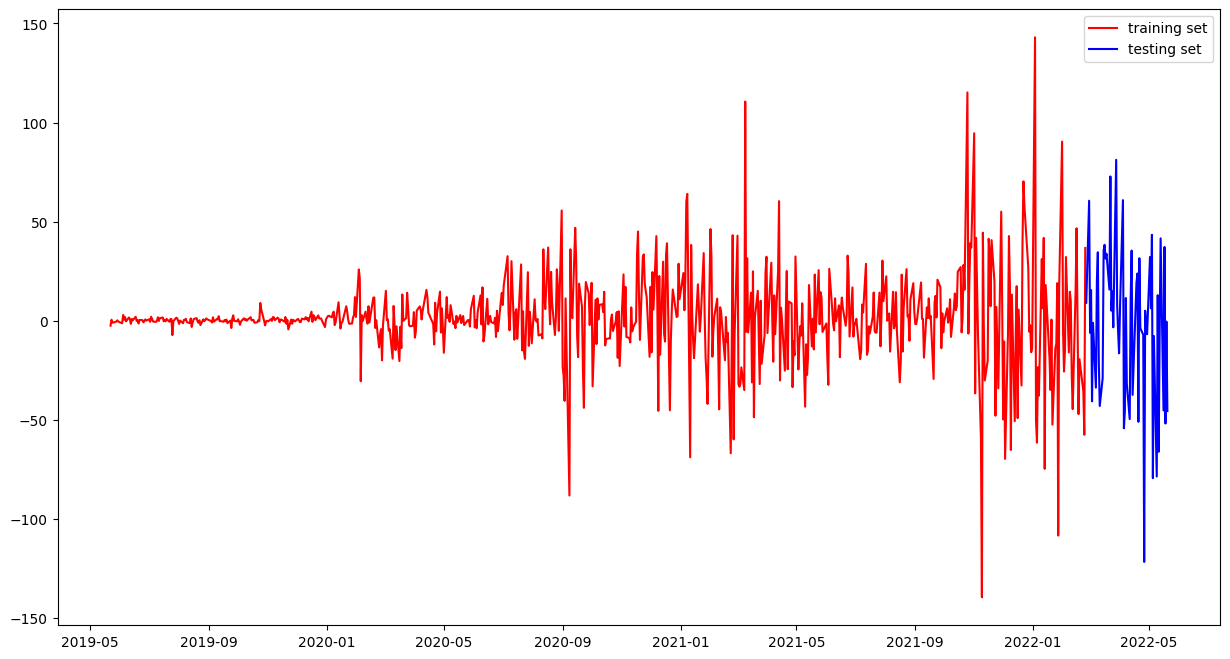

In [33]:
plt.figure(figsize=(15,8))
plt.plot(train_data, color="red", label="training set")
plt.plot(test_data, color="blue", label="testing set")
plt.legend()

In [34]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [35]:
history = [x for x in train_data]

In [36]:
model = ARIMA(history, order=(1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Mon, 22 Jan 2024   AIC                           6303.741
Time:                        15:49:47   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
model.forecast()

array([0.04741687])

In [38]:
test_data[0]

9.0999755859375

In [39]:
mean_squared_error([test_data[0]], model.forecast())

81.94881931903844

In [40]:
import numpy as np

np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

9.052558716685489

In [41]:
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [42]:
for i in p_values:
  for j in d_values:
    for k in q_values:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [43]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [44]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
  dataset= dataset.astype('float32')
  best_score, best_cfg= float('inf'), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order= (p,d,q)
        try:
          rmse= train_arima_model(dataset, test, order)
          if rmse < best_score:
            best_score, best_cfg= rmse, order
          print("ARIMA%s RMSE= %.3f" % (order,rmse))
        except:
          continue
  print("Best ARIMA%s RMSE= %.3f" % (best_cfg, best_score))

In [45]:
train_data = stock_data['Close'][:-60]
test_data = stock_data['Close'][-60:]

In [46]:
import warnings
warnings.filterwarnings('ignore')
p_values= range(0,3)
d_values= range(0,3)
q_values= range(0,3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 457.414
ARIMA(0, 0, 1) RMSE= 241.164
ARIMA(0, 0, 2) RMSE= 173.011
ARIMA(0, 1, 0) RMSE= 39.516
ARIMA(0, 1, 1) RMSE= 39.482
ARIMA(0, 1, 2) RMSE= 39.617
ARIMA(0, 2, 0) RMSE= 57.835
ARIMA(0, 2, 1) RMSE= 39.611
ARIMA(0, 2, 2) RMSE= 39.580
ARIMA(1, 0, 0) RMSE= 39.477
ARIMA(1, 0, 1) RMSE= 39.449
ARIMA(1, 0, 2) RMSE= 39.584
ARIMA(1, 1, 0) RMSE= 39.475
ARIMA(1, 1, 1) RMSE= 39.555
ARIMA(1, 1, 2) RMSE= 39.935
ARIMA(1, 2, 0) RMSE= 46.184
ARIMA(1, 2, 1) RMSE= 39.573
ARIMA(1, 2, 2) RMSE= 39.731
ARIMA(2, 0, 0) RMSE= 39.440
ARIMA(2, 0, 1) RMSE= 39.494
ARIMA(2, 0, 2) RMSE= 39.581
ARIMA(2, 1, 0) RMSE= 39.635
ARIMA(2, 1, 1) RMSE= 39.759
ARIMA(2, 1, 2) RMSE= 39.656
ARIMA(2, 2, 0) RMSE= 45.781
ARIMA(2, 2, 1) RMSE= 39.739
ARIMA(2, 2, 2) RMSE= 39.732
Best ARIMA(2, 0, 0) RMSE= 39.440


In [52]:
history = [x for x in train_data]
predictions = []
for i in range(len(test_data)):
  model = ARIMA(history, order=(2,0,0))
  model = model.fit()
  fc = model.forecast()
  predictions.append(fc)
  history.append(test_data[i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data, predictions))}")

RMSE is 39.43992944070974


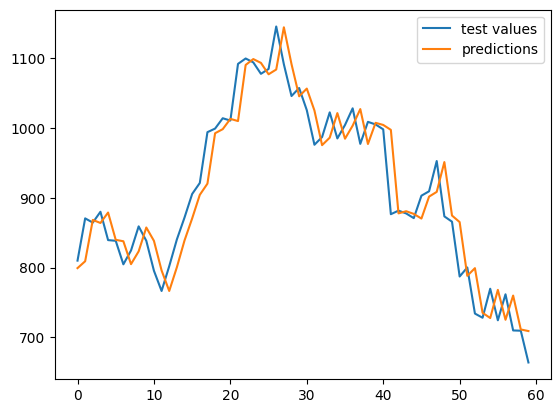

In [53]:
plt.plot(range(len(test_data)), test_data, label="test values")
plt.plot(range(len(predictions)), predictions, label = "predictions")
plt.legend()

In [55]:
fc_series = pd.Series(predictions, index=test_data.index)
fc_series

Date
2022-02-25      [799.142618367526]
2022-02-28     [808.9792965128339]
2022-03-01     [868.2636062842837]
2022-03-02     [863.8102207904988]
2022-03-03     [878.7857732109796]
2022-03-04     [839.6820013838658]
2022-03-07     [837.6330698975344]
2022-03-08     [804.8108052465391]
2022-03-09     [823.1708648541446]
2022-03-10     [857.3630330015519]
2022-03-11     [838.1984550982825]
2022-03-14     [795.7993729972145]
2022-03-15     [766.3876417042446]
2022-03-16     [800.3567177065687]
2022-03-17     [838.7344208313503]
2022-03-18     [870.3305580540309]
2022-03-21     [904.1555127651876]
2022-03-22     [920.2058684863798]
2022-03-23      [992.457369029841]
2022-03-24     [998.2717332008363]
2022-03-25    [1013.0300798032018]
2022-03-28    [1009.8950360950225]
2022-03-29    [1090.2962300449612]
2022-03-30     [1098.738698200637]
2022-03-31    [1093.2588283177042]
2022-04-01    [1076.9429688102518]
2022-04-04    [1083.7653668143191]
2022-04-05    [1144.2944394564952]
2022-04-06    [

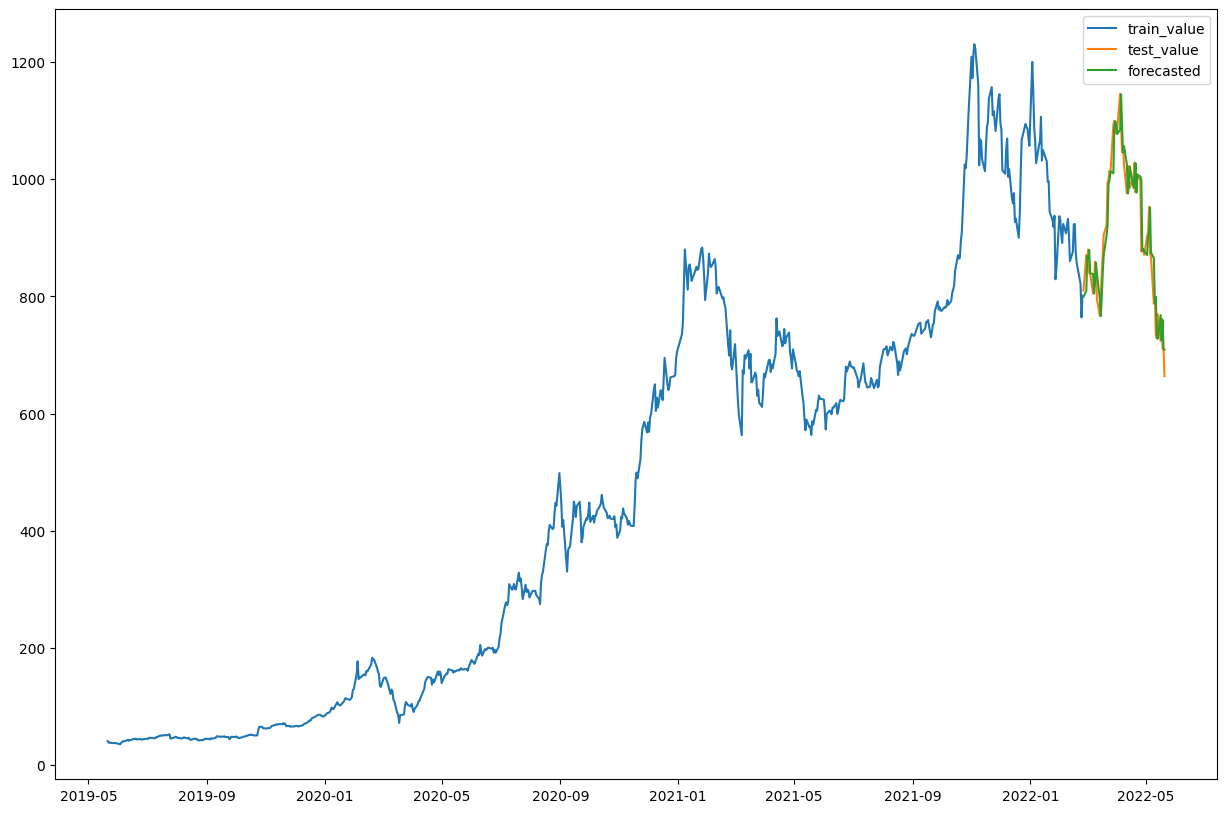

In [58]:
plt.figure(figsize=(15,10))
plt.plot(train_data, label = "train_value")
plt.plot(test_data, label = "test_value")
plt.plot(fc_series, label="forecasted")
plt.legend()

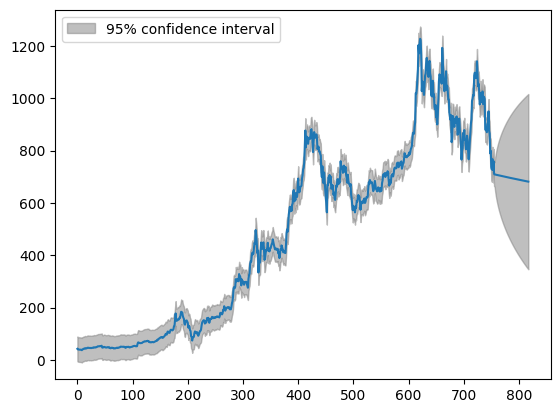

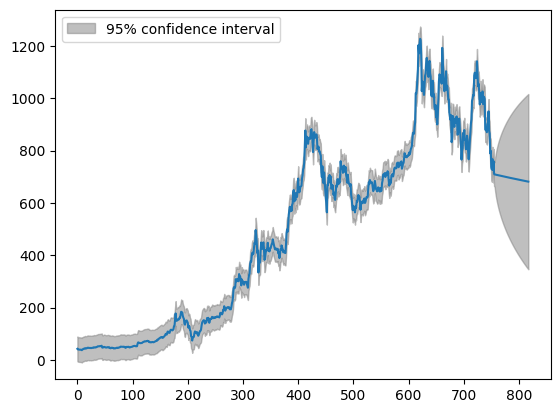

In [61]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(result = model, start = 1, end=len(stock_data['Close'])+60)

In [62]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.73948208025767


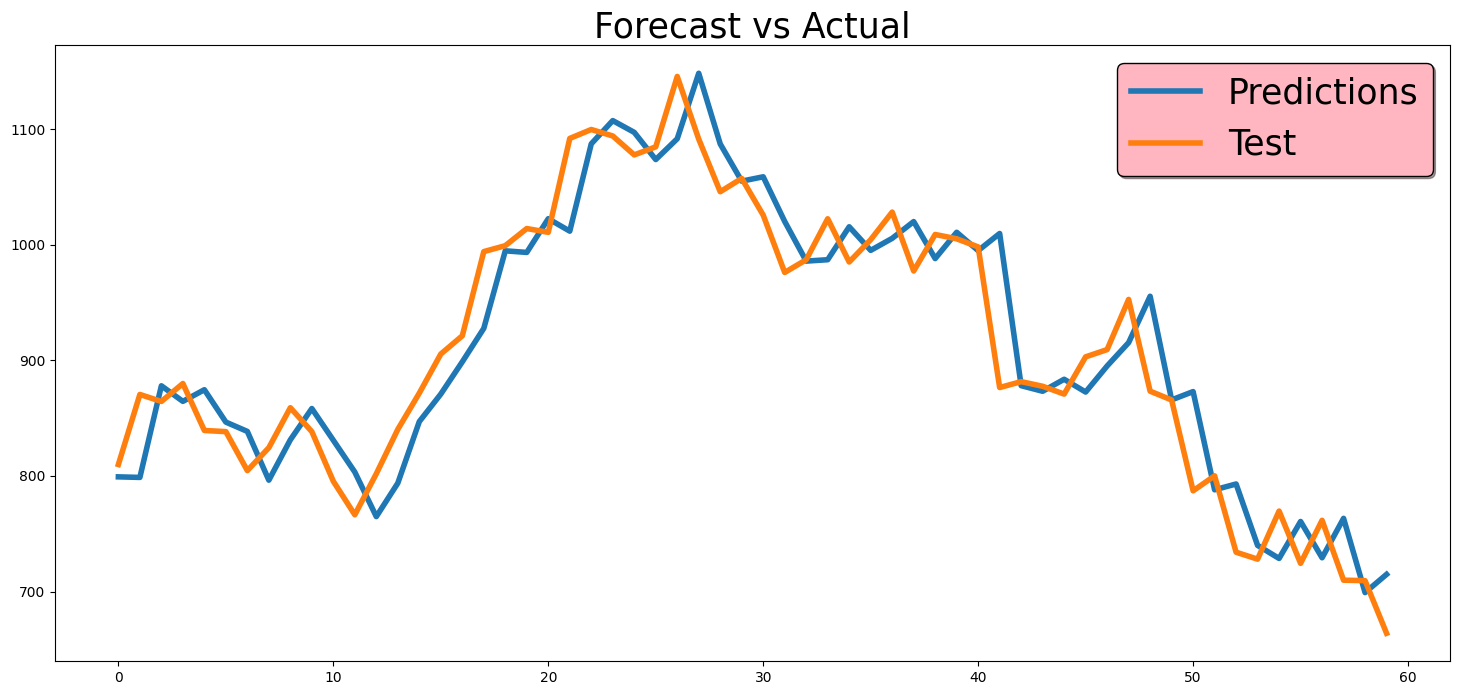

In [64]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Test', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')